#Problem Statement of Instagram Influencers
## 1-Finding the corelated columns
## 2-Frequency distribution of the 3 major columns
## 3-Country which has the highest number of influencers
## 4-Top 10 influencers in the given data set
## 5-Finding the relationship between the features

##Importing the required modules

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Guvi Projects/Influencer.csv')

In [3]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [5]:
# checking null values
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [6]:
df['Country Or Region'].value_counts()

United States             65
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: Country Or Region, dtype: int64

In [7]:
# using mode imputation to filling the null values
df['Country Or Region'].mode()


0    United States
Name: Country Or Region, dtype: object

In [8]:
df['Country Or Region']= (df['Country Or Region'].fillna('United States'))


In [10]:
# again checking null values
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

In [11]:
# Convert string K, M & B to number

df['Followers'] = df['Followers'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['Avg. Likes'] = df['Avg. Likes'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['Posts'] = df['Posts'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['New Post Avg. Likes'] = df['New Post Avg. Likes'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['Total Likes'] = df['Total Likes'].replace({"m":"*1e6", "b":"*1e9"}, regex=True).map(df.eval)

In [12]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,\ndanbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,\nraisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,\nluansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


In [13]:
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

#1 QUESTION
Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.
## ANSWER
New post Avg.likes and Avg.Likes

In [14]:
# corelation feature in given dataset
corr = df.corr().abs()
corr

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,0.354843,0.698193,0.277699,0.058132,0.028900,0.272323,0.465119
Influence Score,0.354843,1.000000,0.365428,0.048502,0.168287,0.072460,0.040011,0.234987
Followers,0.698193,0.365428,1.000000,0.346829,0.069171,0.107439,0.260764,0.667546
Avg. Likes,0.277699,0.048502,0.346829,1.000000,0.348795,0.789359,0.892784,0.361296
Posts,0.058132,0.168287,0.069171,0.348795,1.000000,0.334047,0.285154,0.232038
60-Day Eng Rate,0.028900,0.072460,0.107439,0.789359,0.334047,1.000000,0.866293,0.001560
New Post Avg. Likes,0.272323,0.040011,0.260764,0.892784,0.285154,0.866293,1.000000,0.351335
Total Likes,0.465119,0.234987,0.667546,0.361296,0.232038,0.001560,0.351335,1.000000


In [18]:
df[['New Post Avg. Likes','Avg. Likes']].corr()

,New Post Avg. Likes,Avg. Likes
New Post Avg. Likes,1.000000,0.892784
Avg. Likes,0.892784,1.000000


In [16]:
# highly correlated pair feature

df["New Post Avg. Likes"].corr(df["Avg. Likes"])

0.8927840403263658

<Axes: >

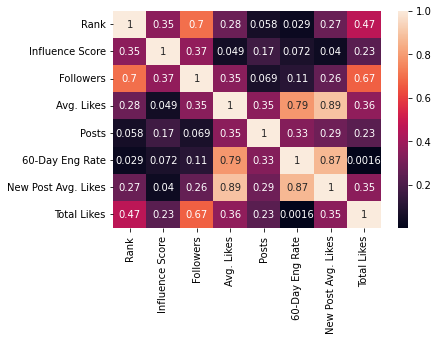

In [17]:
sns.heatmap(corr, annot = True)

#2 QUESTION
##What is the frequency distribution of the following features?
##1) Influence Score
##2) Followers
##3) Posts
#2 ANSWER
##Influence Score: SKEWED DISTRIBUTION
##Followers: SKEWED DISTRIBUTION
#Posts: SKEWED DISTRIBUTION

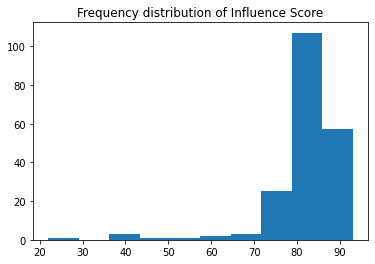

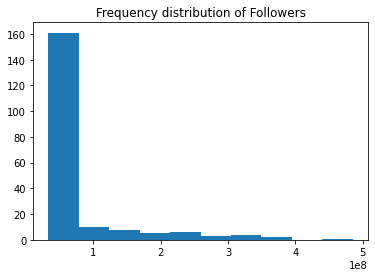

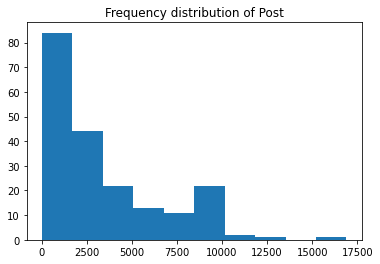

In [19]:
#Checking for the frequency in Influence score column
plt.hist(df['Influence Score'])
plt.title('Frequency distribution of Influence Score')
plt.show()

#Checking for the frequency in Followers column
plt.hist(df['Followers'])
plt.title('Frequency distribution of Followers')
plt.show()

#Checking for the frequency in posts column
plt.hist(df['Posts'])
plt.title('Frequency distribution of Post')
plt.show()

#3 QUESTION
Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.
#3 ANSWER
United States 

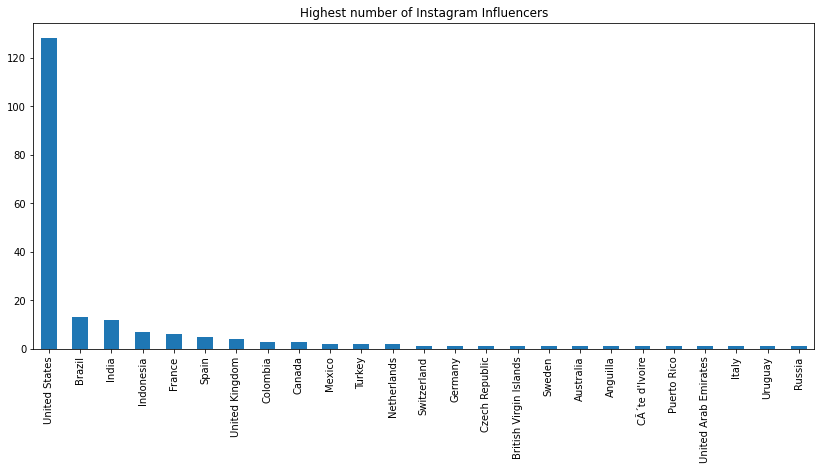

In [20]:
df["Country Or Region"].value_counts().plot.bar(figsize=(14, 6))
plt.title('Highest number of Instagram Influencers')
plt.show()

#4 QUESTION
Who are the top 10 influencers in the given dataset based on the following features
##1) Followers
##2) Average likes
##3) Total Likes

In [22]:
dff = df[["Channel Info","Followers","Avg. Likes","Total Likes"]].sort_values(by =["Followers","Avg. Likes","Total Likes"], ascending = False)
dff[0:10]

,Channel Info,Followers,Avg. Likes,Total Likes
0,\ncristiano,485200000.0,8700000.0,2.910000e+10
1,kyliejenner,370700000.0,8200000.0,5.740000e+10
2,\nleomessi,363900000.0,6700000.0,6.100000e+09
3,\nselenagomez,348800000.0,6100000.0,1.140000e+10
4,\ntherock,339400000.0,1800000.0,1.260000e+10
5,\narianagrande,333000000.0,3700000.0,1.850000e+10
6,\nkimkardashian,330700000.0,3500000.0,1.980000e+10
7,\nbeyonce,276100000.0,3600000.0,7.300000e+09
8,\nkhloekardashian,273900000.0,2400000.0,9.800000e+09
9,\njustinbieber,260000000.0,1900000.0,1.400000e+10


#5 QUESTION
Describe the relationship between the following pairs of features using a suitable graph
##a) Followers and Total Likes
##b) Followers and Influence Score
##c) Posts and Average likes
##d) Posts and Influence Score

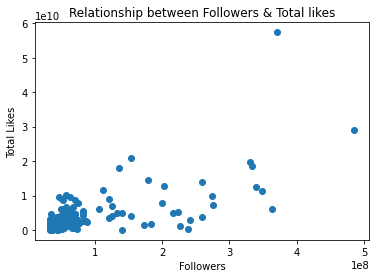

In [29]:
# Followers and Total Likes

plt.scatter(df['Followers'],df['Total Likes'])
plt.xlabel('Followers')
plt.ylabel('Total Likes')
plt.title('Relationship between Followers & Total likes')
plt.show()



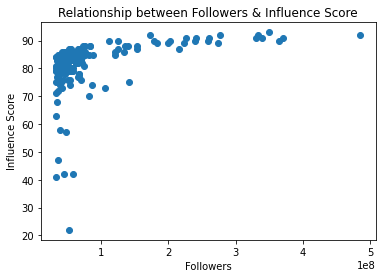

In [30]:
# Followers and Influence Score

plt.scatter(df['Followers'],df['Influence Score'])
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.title('Relationship between Followers & Influence Score')
plt.show()


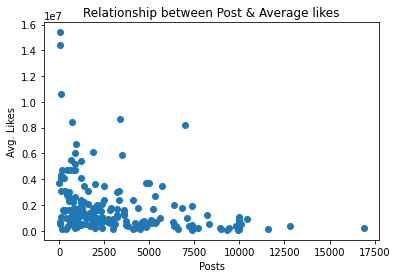

In [31]:
# Posts and Average likes

plt.scatter(df['Posts'], df['Avg. Likes'])
plt.xlabel('Posts')
plt.ylabel('Avg. Likes')
plt.title('Relationship between Post & Average likes')
plt.show()

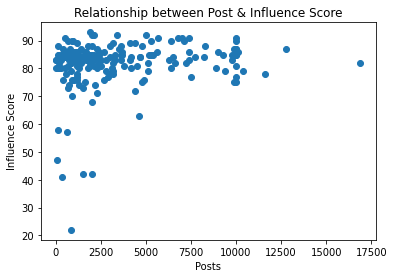

In [32]:
# Posts and Influence Score
plt.scatter(df['Posts'], df['Influence Score'])
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.title('Relationship between Post & Influence Score')
plt.show()

In [33]:
from scipy.stats import spearmanr

# Define the pairs of column names to compute the Spearman correlation coefficient
data = [["Followers","Total Likes"],["Followers", "Influence Score"],["Posts","Avg. Likes"],["Posts","Influence Score"]]

# Loop through the pairs of column names and compute the Spearman correlation coefficient and p-value
for pair in data:
    col1 = pair[0]
    col2 = pair[1]
    corr_coef, p_value = spearmanr(df[col1], df[col2])
    
    # Print the correlation coefficient and p-value
    print('The Spearman correlation coefficient between', col1, 'and', col2, 'is:', corr_coef)
    print('The p-value is:', p_value)
    
    # Check the strength of the correlation based on the p-value
    if p_value < 0.05:
        if corr_coef >= 0.7:
            print('There is a strong positive correlation.')
        elif 0.3 <= corr_coef < 0.7:
            print('There is a moderate positive correlation.')
        elif -0.3 <= corr_coef < 0.3:
            print('There is a weak or no correlation.')
        elif -0.7 <= corr_coef < -0.3:
            print('There is a moderate negative correlation.')
        else:
            print('There is a strong negative correlation.')
    else:
        print('There is no statistically significant correlation.')
    print()  # Print an empty line to separate the output for different pairs of column names

The Spearman correlation coefficient between Followers and Total Likes is: 0.5663597563788829
The p-value is: 2.3204465229540027e-18
There is a moderate positive correlation.

The Spearman correlation coefficient between Followers and Influence Score is: 0.5733527535176081
The p-value is: 7.127215769707509e-19
There is a moderate positive correlation.

The Spearman correlation coefficient between Posts and Avg. Likes is: -0.5147784223679804
The p-value is: 6.284083921562635e-15
There is a moderate negative correlation.

The Spearman correlation coefficient between Posts and Influence Score is: 0.1648098301943469
The p-value is: 0.019694163337771287
There is a weak or no correlation.

